In [77]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

df = pd.read_csv("clean_data.csv")
df.drop(columns=['name', "url", "result", "type"], inplace=True)
df.dropna(inplace=True)
df['genres'] = df['genres'].apply(lambda x: x.split(',') if isinstance(x, str) else x)
df['countries'] = df['countries'].apply(lambda x: x.split(',') if isinstance(x, str) else x)

df


,genres,rating,no_of_votes,meta_score,release_date,gross,budget,countries,ROI
1,"[Martial Arts, Action, Comedy]",5.3,6800,34.0,2025.0,17235040.0,18000000.0,[United States],-0.042498
2,"[Action, Drama, Romance, Thriller, Western]",6.5,107000,49.0,1995.0,18636537.0,32000000.0,"[United States, Japan]",-0.417608
5,"[Animal Adventure, Computer Animation, Fairy...",7.8,200000,73.0,2022.0,481757663.0,90000000.0,"[United States, Japan]",4.352863
17,"[Sci-Fi Epic, Superhero, Urban Adventure, A...",7.4,195000,82.0,1978.0,300478449.0,55000000.0,"[United States, United Kingdom, Switzerland,...",4.463245
20,"[Holiday Comedy, Action, Adventure, Comedy,...",6.3,137000,34.0,2024.0,185900759.0,350000000.0,"[United States, Canada]",-0.468855
...,...,...,...,...,...,...,...,...,...
4831,"[Romantic Epic, Western Epic, Adventure, Dr...",6.6,70000,49.0,1992.0,137783840.0,60000000.0,[United States],1.296397
4832,"[Drama, Western]",7.3,67000,61.0,1985.0,41410568.0,6900000.0,[United States],5.001532
4834,"[Buddy Comedy, Martial Arts, Action, Advent...",6.6,138000,77.0,2000.0,99274467.0,55000000.0,"[United States, Hong Kong]",0.804990
4837,"[Drama, Western]",5.8,12000,42.0,2016.0,20672.0,10000000.0,[United States],-0.997933


In [79]:
# Đếm số lần xuất hiện của mỗi genre và country
genre_counts = df['genres'].explode().value_counts()
country_counts = df['countries'].explode().value_counts()

# Lấy top 10 genres và countries phổ biến nhất
top_10_genres = genre_counts.head(10).index.tolist()
top_10_countries = country_counts.head(10).index.tolist()

# Lọc các giá trị genres và countries trong top 10
df['genres'] = df['genres'].apply(lambda x: [g for g in x if g in top_10_genres])
df['countries'] = df['countries'].apply(lambda x: [c for c in x if c in top_10_countries])
# Sử dụng MultiLabelBinarizer để one-hot encode genres và countries
mlb_genres = MultiLabelBinarizer(classes=top_10_genres)
mlb_countries = MultiLabelBinarizer(classes=top_10_countries)

# Áp dụng One-Hot Encoding
genres_encoded = pd.DataFrame(mlb_genres.fit_transform(df['genres']), columns=mlb_genres.classes_)
countries_encoded = pd.DataFrame(mlb_countries.fit_transform(df['countries']), columns=mlb_countries.classes_)


# Kết hợp lại với dữ liệu gốc
df = pd.concat([df, genres_encoded, countries_encoded], axis=1)
df.drop(columns=['genres', 'countries'], inplace=True)

In [80]:
df

,rating,no_of_votes,meta_score,release_date,gross,budget,ROI,Drama,Comedy,Adventure,...,United States,United States,United Kingdom,United Kingdom,Canada,France,Japan,Germany,China,Australia
1,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,-0.042498,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,-0.417608,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,7.8,200000.0,73.0,2022.0,481757663.0,90000000.0,4.352863,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,7.4,195000.0,82.0,1978.0,300478449.0,55000000.0,4.463245,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,6.3,137000.0,34.0,2024.0,185900759.0,350000000.0,-0.468855,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


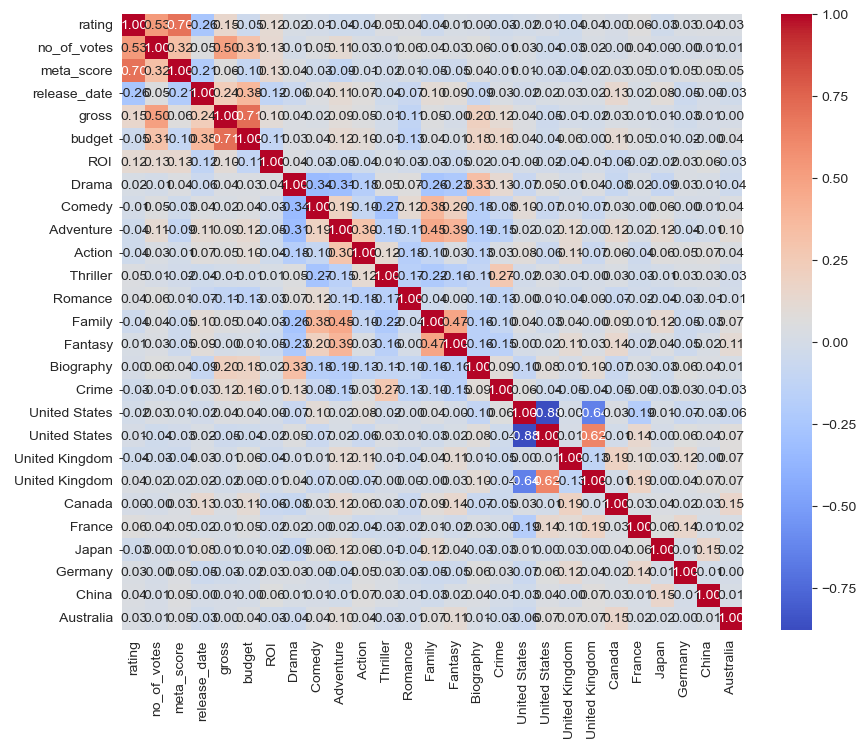

rating             0.148764
no_of_votes        0.499054
meta_score         0.063278
release_date       0.235052
gross              1.000000
budget             0.708749
ROI                0.097192
 Drama             0.036732
 Comedy            0.019366
 Adventure         0.087804
 Action            0.053795
 Thriller         -0.014298
 Romance          -0.114711
 Family            0.050076
 Fantasy          -0.003989
 Biography         0.202248
 Crime             0.118356
United States      0.042844
 United States    -0.046175
 United Kingdom   -0.010012
United Kingdom    -0.017769
 Canada            0.027314
 France            0.013412
 Japan             0.007790
 Germany          -0.028724
 China             0.009173
 Australia         0.003435
Name: gross, dtype: float64


In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan
correlation_matrix = df.corr()

# Vẽ biểu đồ heatmap tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# In tương quan với doanh thu (gross)
print(correlation_matrix['gross'])


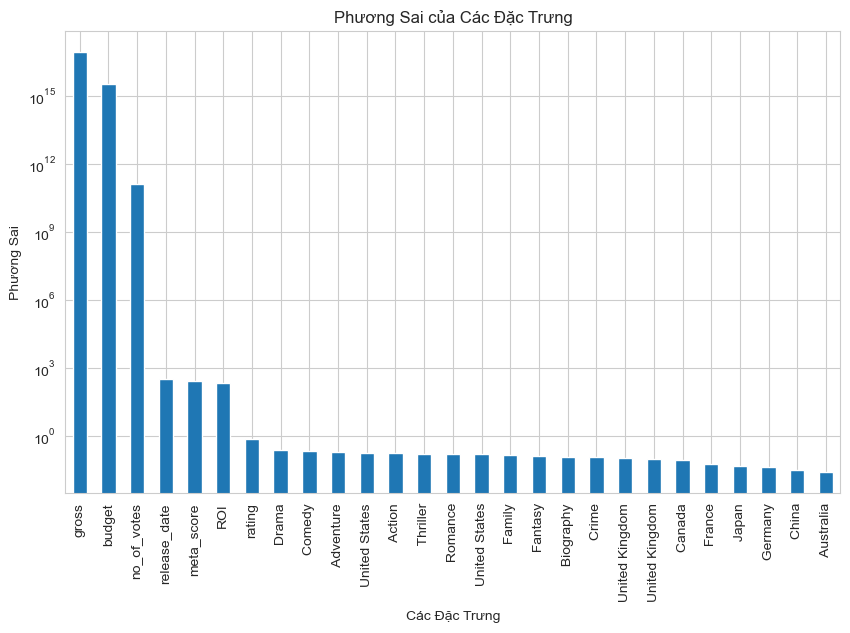

In [96]:
# Tính phương sai của từng đặc trưng
variance = df.var()

plt.figure(figsize=(10, 6))
variance.sort_values(ascending=False).plot(kind='bar')
plt.title('Phương Sai của Các Đặc Trưng')
plt.ylabel('Phương Sai')
plt.xlabel('Các Đặc Trưng')
plt.yscale('log')
plt.show()


In [90]:
from sklearn.ensemble import RandomForestRegressor

# Loại bỏ các dòng có NaN trong cột 'gross'
df_clean = df.dropna(subset=df.columns)



df_clean


,rating,no_of_votes,meta_score,release_date,gross,budget,ROI,Drama,Comedy,Adventure,...,United States,United States,United Kingdom,United Kingdom,Canada,France,Japan,Germany,China,Australia
1,5.3,6800.0,34.0,2025.0,17235040.0,18000000.0,-0.042498,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6.5,107000.0,49.0,1995.0,18636537.0,32000000.0,-0.417608,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,7.8,200000.0,73.0,2022.0,481757663.0,90000000.0,4.352863,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17,7.4,195000.0,82.0,1978.0,300478449.0,55000000.0,4.463245,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,6.3,137000.0,34.0,2024.0,185900759.0,350000000.0,-0.468855,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1590,6.5,8200.0,66.0,2025.0,5406023.0,1800000.0,2.003346,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1596,7.3,276000.0,78.0,2024.0,77314862.0,17500000.0,3.417992,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1600,8.8,2400000.0,67.0,1999.0,101321009.0,63000000.0,0.608270,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1608,7.8,347000.0,82.0,2005.0,121803070.0,28000000.0,3.350110,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


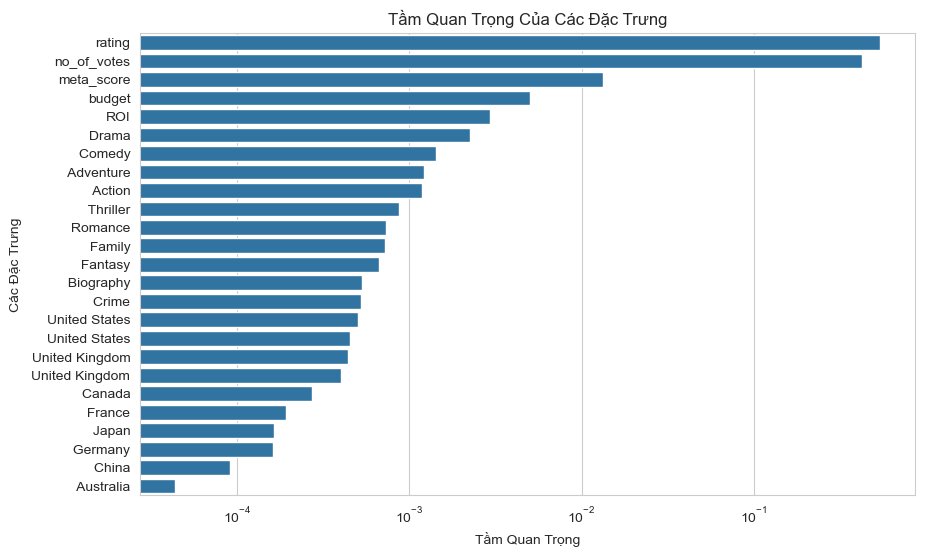

In [98]:
# Tách lại X và y sau khi loại bỏ NaN
X = df_clean.drop([ 'gross', 'release_date'], axis=1)
y = df_clean['gross']

# Xây dựng mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# In tầm quan trọng của các đặc trưng
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])
feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['importance'])

# Vẽ đồ thị tầm quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y=feature_importances.index, data=feature_importances.sort_values(by='importance', ascending=False))
plt.title('Tầm Quan Trọng Của Các Đặc Trưng')
plt.xlabel('Tầm Quan Trọng')
plt.ylabel('Các Đặc Trưng')
plt.xscale('log')
plt.show()

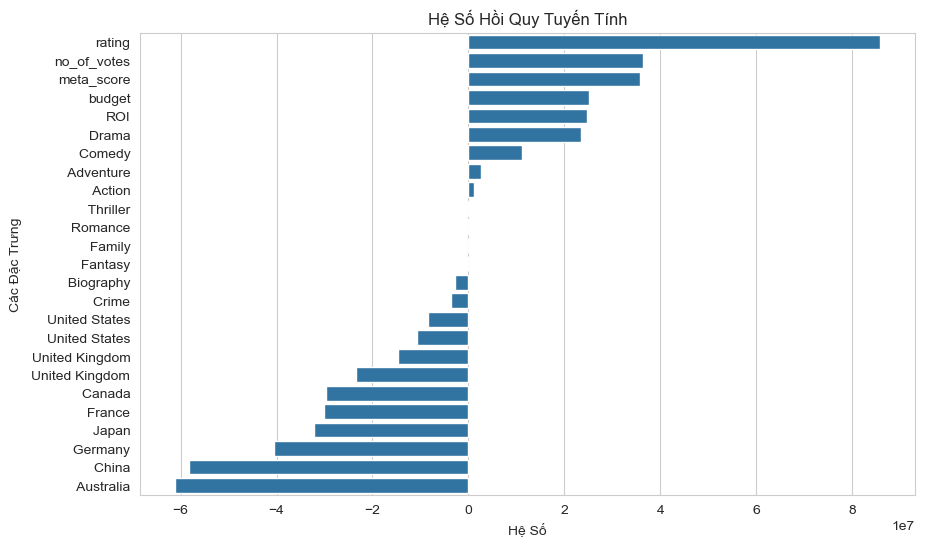

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành training và testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
lr = LinearRegression()
lr.fit(X_train, y_train)

# In các hệ số hồi quy (coefficient)
coefficients = pd.DataFrame(lr.coef_, index=X.columns, columns=['coefficient'])



# Vẽ đồ thị hệ số hồi quy
plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y=coefficients.index, data=coefficients.sort_values(by='coefficient', ascending=False))
plt.title('Hệ Số Hồi Quy Tuyến Tính')
plt.xlabel('Hệ Số')
plt.ylabel('Các Đặc Trưng')
plt.show()


In [94]:
import statsmodels.api as sm
from statsmodels.tools import add_constant

# Thêm một hằng số (intercept) vào dữ liệu
X_with_intercept = add_constant(X)

# Mô hình hồi quy tuyến tính để tính AIC
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# In AIC
print(f'AIC: {results.aic}')


AIC: 26694.838405776103
